In [ ]:
# https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/

前兩個 experiment 可以不用跑，只是試用兩個 pre-trained model。

# Experiment - Resnet

In [ ]:
from torchvision import models
import torch

dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
!cd '/content/drive/MyDrive/influencer'
!ls

drive  sample_data


In [ ]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

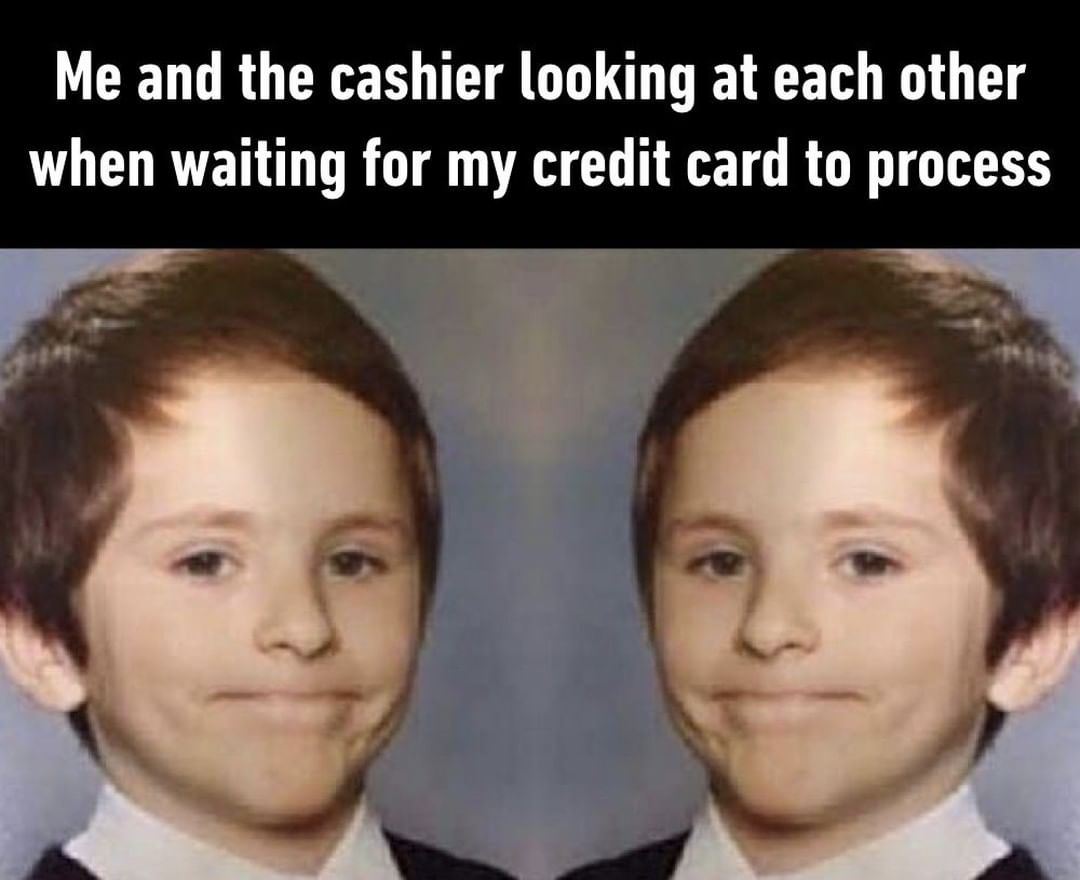

In [ ]:
# Import Pillow
from PIL import Image
img = Image.open("/content/drive/MyDrive/brand-123/9gag/1/_0.jpg")
img

In [ ]:
img_t = transform(img)
print(img_t.shape) # 3 -> RGB
batch_t = torch.unsqueeze(img_t, 0)
print(batch_t.shape)

torch.Size([3, 224, 224])
torch.Size([1, 3, 224, 224])


In [ ]:
# First, load the model
resnet = models.resnet101(pretrained=True)

# Second, put the network in eval mode
resnet.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Third, carry out model inference
out = resnet(batch_t)
out.shape

torch.Size([1, 1000])

In [ ]:
out.detach().numpy()

array([[-1.80620265e+00, -3.25134516e+00, -1.51356673e+00,
        -1.63689363e+00, -1.72222447e+00,  3.16497177e-01,
        -2.87209004e-01, -1.80881011e+00, -1.05720210e+00,
         1.45653760e+00, -5.13436413e+00, -6.13994789e+00,
        -2.05408096e+00, -1.01353264e+00, -1.16045105e+00,
        -9.56207335e-01, -2.69841909e+00, -2.54226327e+00,
        -3.97445226e+00,  2.50440419e-01, -2.80498219e+00,
        -2.69553971e+00, -4.28031778e+00, -1.01656008e+00,
        -4.16046524e+00, -4.48043156e+00, -5.83695793e+00,
        -3.74323273e+00, -1.33935702e+00, -3.53437304e+00,
        -4.53283596e+00, -5.50724602e+00, -5.27724361e+00,
        -8.47139239e-01,  1.72162402e+00, -3.03175211e+00,
        -9.98653650e-01, -8.95863175e-01, -3.39983153e+00,
        -3.28077078e+00, -4.06304359e+00, -1.40608788e+00,
        -3.10250115e+00, -5.19037306e-01, -4.64421892e+00,
         1.67917907e-01, -4.51232576e+00, -4.11646986e+00,
        -4.19407755e-01, -1.08780491e+00, -6.58060491e-0

In [ ]:
# out.detach().numpy()
out

tensor([[-1.8062e+00, -3.2513e+00, -1.5136e+00, -1.6369e+00, -1.7222e+00,
          3.1650e-01, -2.8721e-01, -1.8088e+00, -1.0572e+00,  1.4565e+00,
         -5.1344e+00, -6.1399e+00, -2.0541e+00, -1.0135e+00, -1.1605e+00,
         -9.5621e-01, -2.6984e+00, -2.5423e+00, -3.9745e+00,  2.5044e-01,
         -2.8050e+00, -2.6955e+00, -4.2803e+00, -1.0166e+00, -4.1605e+00,
         -4.4804e+00, -5.8370e+00, -3.7432e+00, -1.3394e+00, -3.5344e+00,
         -4.5328e+00, -5.5072e+00, -5.2772e+00, -8.4714e-01,  1.7216e+00,
         -3.0318e+00, -9.9865e-01, -8.9586e-01, -3.3998e+00, -3.2808e+00,
         -4.0630e+00, -1.4061e+00, -3.1025e+00, -5.1904e-01, -4.6442e+00,
          1.6792e-01, -4.5123e+00, -4.1165e+00, -4.1941e-01, -1.0878e+00,
         -6.5806e-01, -6.3163e-01, -1.4893e+00, -3.8242e+00,  1.6163e+00,
         -4.6546e+00, -1.9090e+00, -4.6679e+00, -2.3373e+00, -1.5576e+00,
         -3.1997e-01, -1.2578e+00, -2.1529e+00,  1.2440e+00, -1.4711e+00,
         -3.6979e+00, -5.3857e-01, -1.

In [ ]:
# load 1000 class labels
with open('/content/drive/MyDrive/code/img_feature/imagenet1000_clsidx_to_labels.txt') as f:
  labels = [line.strip() for line in f.readlines()]


In [ ]:
# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


[("416: 'balance beam, beam',", 11.724872589111328),
 ("602: 'horizontal bar, high bar',", 10.29926872253418),
 ("459: 'brassiere, bra, bandeau',", 7.033524513244629),
 ("445: 'bikini, two-piece',", 6.432186126708984),
 ("702: 'parallel bars, bars',", 5.698465347290039)]

In [ ]:
weights = models.ResNet50_Weights.DEFAULT
preprocess = weights.transforms()
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

# Experiment - VGG16

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
from PIL import Image, ImageFile
# to successfully load truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Set the GPU as the default device for TensorFlow
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')

In [ ]:
# Load the VGG16 model with weights pretrained on ImageNet
model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


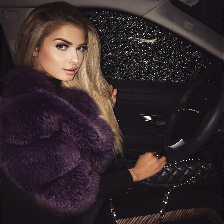

In [ ]:
img_path = '/content/drive/MyDrive/brand-123/_luxury_fashion_style/10/_0.jpg'
# img_path = '/content/drive/MyDrive/brand-123/sneakermyth/11/_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img

In [ ]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
x = preprocess_input(x)

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
# Make predictions on GPU
with tf.device('/GPU:0'):  # Specify the GPU device to use
  features = model.predict(x)
features.shape

1/1 [==============================] - 0s 19ms/step


(1, 7, 7, 512)

In [ ]:
output = features.reshape((1,-1))
output.shape

(1, 25088)

In [ ]:
type(output)

numpy.ndarray

In [ ]:
# Interpret the predictions -> 如果有後三層 FC 會輸出 1000 class 才需要
decoded_predictions = tf.keras.applications.vgg16.decode_predictions(features, top=5)

# Print the top predicted classes and their probabilities
for i, (class_id, class_name, prob) in enumerate(decoded_predictions[0]):
    print(f"Top {i+1} Prediction: Class '{class_name}', Probability: {prob:.4f}")

In [ ]:
img_path = '/content/drive/MyDrive/brand-123/_luxury_fashion_style/10/_0.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

# predict function - VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
from PIL import Image, ImageFile
# to successfully load truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Set the GPU as the default device for TensorFlow
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')

In [ ]:
# Load the VGG16 model with weights pretrained on ImageNet
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
batch_size = 50

def extract_vgg16_gpu(image_paths):

    batch = np.zeros((batch_size, 224, 224, 3))
    for i, image_path in enumerate(image_paths):
        img = image.load_img(image_path, target_size=(224, 224))  # would be auto transformed to RGB
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        batch[i] = x

    # Carry out model inference
    with tf.device('/GPU:0'):  # Specify the GPU device to use
        features = model.predict(batch)
        output = features.reshape(features.shape[0], -1)

    if output.shape != (batch_size, 25088):
        print("!!!!!! shape error", output.shape)

    # print(out.shape)

    return output

# predict function - Resnet

In [ ]:
from torchvision import models
import torch
from torchvision.models import resnet101, ResNet101_Weights

In [ ]:
# First, load the model
resnet = models.resnet101(pretrained=True)

# Second, put the network in eval mode
resnet.eval()

# Initialize the Weight Transforms
weights = ResNet101_Weights.DEFAULT
preprocess = weights.transforms()

from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

from PIL import Image, ImageFile
# to successfully load truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# load 1000 class labels
with open('/content/drive/MyDrive/code/img_feature/imagenet1000_clsidx_to_labels.txt') as f:
  labels = [line.strip() for line in f.readlines()]


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [ ]:
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
test_img_list = ['/content/drive/MyDrive/brand-123/9gag/1/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/104/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/106/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/106/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/105/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/105/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/110/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/11/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/107/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/102/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/100/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/101/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/10/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/123/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/113/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/113/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/120/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/112/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/118/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/117/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/119/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/119/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/12/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/12/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/124/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/116/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/116/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/135/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/135/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/13/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/128/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/128/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/126/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/126/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/133/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/134/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/127/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/125/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/129/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/129/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/132/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/132/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/136/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/14/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/138/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/138/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/139/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/15/_1.jpg', '/content/drive/MyDrive/brand-123/9gag/141/_0.jpg', '/content/drive/MyDrive/brand-123/9gag/141/_1.jpg']

## Use GPU to predict

In [ ]:
# Move the model to the GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
resnet.to(device)
resnet.eval()  # set the model to evaluation mode

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
batch_size = 50
def extract_resnet_gpu(image_paths):

    batch = torch.zeros((batch_size, 3, 224, 224))
    for i, image_path in enumerate(image_paths):
        image = Image.open(image_path).convert('RGB') # img may be grayscale or 4 scale
        try:
            # image = transform(image)
            image = preprocess(image)
        except Exception as e:
            print(image_path)
            # raise e

        batch[i] = image

    # Move the batch tensor to the GPU
    batch = batch.to(device)

    # Carry out model inference
    with torch.no_grad():
        out = resnet(batch)
        out = out.detach().cpu().numpy()

    # Forth, print the top 5 classes predicted by the model
    # _, indices = torch.sort(out, descending=True)
    # percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    # print([(labels[idx], percentage[idx].item()) for idx in indices[0][:5]])

    if out.shape != (batch_size, 1000):
        print("!!!!!! shape error")

    return out

# extract brand image embedding

In [ ]:
import os
import pickle
from os import listdir, path
import numpy as np

In [ ]:
with open('/content/drive/MyDrive/code/sorted_360_brand_list.pkl', 'rb') as f:
    all_brands = pickle.load(f)
with open('/content/drive/MyDrive/code/sorted_3748_inf_list.pkl', 'rb') as f:
    all_infs = pickle.load(f)

In [ ]:
with open('/content/drive/MyDrive/code/img_feature/brand_post_images_vgg16.pickle', 'rb') as f:
    brand_dict = pickle.load(f)

In [ ]:
brand_dict = {}

In [ ]:
for brand in sorted(os.listdir("/content/drive/MyDrive/brand-123")):
    print(brand)
    if all_brands.index(brand) in brand_dict:
        print("already in dict.")
        continue

    brand_img_emb = []
    onlyfiles = []
    for folder in sorted(os.listdir(os.path.join("/content/drive/MyDrive/brand-123/", brand))):
        now_path = os.path.join("/content/drive/MyDrive/brand-123/", brand, folder)
        onlyfiles += [os.path.join(now_path, f) for f in os.listdir(now_path)]

    if len(onlyfiles) < 50:
        print(brand, "doesn't have 50 images.")
        continue

    brand_img_emb = extract_vgg16_gpu(onlyfiles) # (50, 1000)
    brand_dict[all_brands.index(brand)] = brand_img_emb

    with open("/content/drive/MyDrive/code/img_feature/brand_post_images_vgg16.pickle", "wb") as f:
        pickle.dump(brand_dict, f)

    # for filename in os.listdir(os.path.join("/content/drive/MyDrive/brand-123/", brand, folder)):
    #   if filename[-3:] != 'jpg':
    #     print(brand, folder, filename, "!!!!!!")
    #     continue

    #   image_emb = extract_resnet(str(os.path.join("/content/drive/MyDrive/brand-123/", brand, folder, filename)))
    #   brand_img_emb.append(image_emb)

  # brand_img_emb = np.array(brand_img_emb)
  # print(brand_img_emb.shape)

  # brand_dict[all_brands.index(brand)] = brand_img_emb

icaseleluxe
2/2 [==============================] - 0s 153ms/step
icelandair
2/2 [==============================] - 0s 143ms/step
iconic.london
2/2 [==============================] - 0s 154ms/step
imgmodels
2/2 [==============================] - 0s 149ms/step
insideweddings
2/2 [==============================] - 0s 152ms/step
intel
2/2 [==============================] - 0s 143ms/step
itunes
2/2 [==============================] - 0s 149ms/step
jetblue
2/2 [==============================] - 0s 152ms/step
jlaudioinc
2/2 [==============================] - 0s 148ms/step
jordanaddict
2/2 [==============================] - 0s 154ms/step
junkyardgirls
2/2 [==============================] - 0s 152ms/step
karleeskupcakes
2/2 [==============================] - 0s 153ms/step
kicksonabudget
2/2 [==============================] - 0s 152ms/step
kickstarter
2/2 [==============================] - 0s 155ms/step
kingarthurflour
2/2 [==============================] - 0s 152ms/step
kingfisherworld
2/2 [====

till twinsetofficial

In [ ]:
all_brand_posts = []
for i in range(360):
    all_brand_posts.append(brand_dict[i])
all_brand_posts = np.array(all_brand_posts)
print(all_brand_posts.shape)

(360, 50, 1000)


In [ ]:
np.save("/content/drive/MyDrive/code/img_feature/brand_post_images_resnet101.npy", all_brand_posts)

# extract inf image embedding

In [ ]:
inf_dict = {}

In [ ]:
not_50_inf = []
inf_not_int_list = []
flag = False
cnt = 0

for brand in sorted(os.listdir("/content/drive/MyDrive/influencer_next"))[17:]:

    for inf in sorted(os.listdir(os.path.join("/content/drive/MyDrive/influencer_next", brand))):
        inf_lower = inf.lower()

        # if brand == "kixify" and not flag:
        #   if inf == "alexanderjohndesign":
        #     flag = True
        #   else:
        #     continue

    # if influencer not in list, pass
        try:
            all_infs.index(inf_lower)
        except ValueError:
            print("---> ", inf_lower, "not in list. pass.")
            inf_not_int_list.append(inf_lower)
            continue

        # if influencer already in dict, pass
        if all_infs.index(inf_lower) in inf_dict:
            continue

        print(brand, inf)
        inf_img_emb = []
        onlyfiles = []

        for folder in sorted(os.listdir(os.path.join("/content/drive/MyDrive/influencer_next/", brand, inf))):
            now_path = os.path.join("/content/drive/MyDrive/influencer_next/", brand, inf, folder)
            onlyfiles += [os.path.join(now_path, f) for f in os.listdir(now_path)]

        if len(onlyfiles) != 50:
            print(brand, inf, "doesn't have 50 images.", len(onlyfiles))
            not_50_inf.append((brand, inf))
            continue

        inf_img_emb = extract_vgg16_gpu(onlyfiles) # (50, 1000)

        inf_dict[all_infs.index(inf_lower)] = inf_img_emb

        if cnt != 0 and cnt % 10 == 0:
            with open("/content/drive/MyDrive/code/img_feature/inf_post_images_vgg16_next_new.pickle", "wb") as f:
                pickle.dump(inf_dict, f)




--->  carnegiemellon not in list. pass.
--->  chaosgroup not in list. pass.
--->  energy not in list. pass.
--->  htcvive not in list. pass.
nvidia first_official_
2/2 [==============================] - 0s 141ms/step
nvidia gensler_design
2/2 [==============================] - 0s 148ms/step
nvidia georgemasonu
2/2 [==============================] - 0s 144ms/step
nvidia georgiatech
2/2 [==============================] - 0s 148ms/step
nvidia hexeract
2/2 [==============================] - 0s 147ms/step
nypl americanantiquarian
2/2 [==============================] - 0s 147ms/step
nypl baltimoremuseumofart
2/2 [==============================] - 0s 147ms/step
nypl bklynlibrary
2/2 [==============================] - 0s 143ms/step
nypl bookfacemagazine
2/2 [==============================] - 0s 149ms/step
nypl californiahistoricalsociety
2/2 [==============================] - 0s 149ms/step
nypl camerasanddancers
2/2 [==============================] - 0s 147ms/step
nypl cheshirelibrary
2/2 [===

# 確認檔案正常

In [ ]:
# 圖片打開後加上 .convert('RGB') 就沒有灰階等問題。
def check_img_valid(image_paths):
    for image_path in image_paths:
        image = Image.open(image_path).convert('RGB') # img may be grayscale or 4 scale
        image.show()
        try:
            image = transform(image)
        except Exception as e:
            print(image_path)
            print(e)
            print("recover image...")
            # with open(image_path, "rb") as f:
            #   f = f.read()
            # f = f+B'\xff'+B'\xd9'
            # im = Image.open(BytesIO(f)).convert('RGB')
            # imr = im.resize((256, 256), resample=Image.BILINEAR)
            # imr.show()
            # plt.imshow(im)
            # plt.show()
            # image = transform(image)

            raise e

## 處理 truncated image 毀損圖片

In [ ]:
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

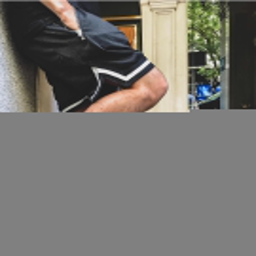

In [ ]:
with open("/content/drive/MyDrive/brand-123/sneakermyth/11/_1.jpg", "rb") as f:
  f = f.read()
f=f+B'\xff'+B'\xd9'
im = Image.open(BytesIO(f))
if im.mode != "RGB":
  im = im.convert('RGB')
imr = im.resize((256, 256), resample=Image.BILINEAR)
imr.show()
